# **Processing the Data**

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

df = pd.read_csv("https://www.dropbox.com/s/ng1zijfpsayzseu/pokedex_%28Update_04.21%29_3.csv?dl=1",index_col=0,encoding= 'unicode_escape')

**Drop features that are clearly not needed.**

In [ ]:
df = df.drop(labels = ['pokedex_number','name','german_name','japanese_name','generation','species','type_number','abilities_number',
                       'ability_1','ability_2','ability_hidden','base_friendship','percentage_male','egg_type_number','egg_type_2',
                       'against_normal','against_fire','against_water','against_electric','against_grass','against_ice','against_fight',
                       'against_poison','against_ground','against_flying','against_psychic','against_bug','against_rock','against_ghost',
                       'against_dragon','against_dark','against_steel','against_fairy'], axis = 1)
df = df.drop(1033) # remove eternamax because it is a huge outlier

**Preview the distribution of pokemon per type.**

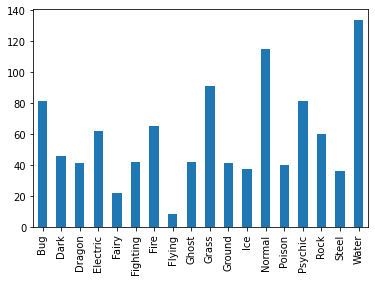

In [ ]:
df['type_1'].value_counts().sort_index().plot.bar()

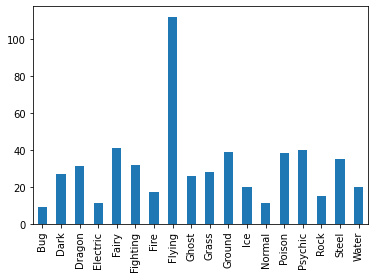

In [ ]:
df['type_2'].value_counts().sort_index().plot.bar()

In [ ]:
df.describe()

,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_experience,egg_cycles
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,1.279598,71.216571,438.696360,69.890805,80.443487,74.502874,72.981801,72.128352,68.749042,92.919540,155.250000,31.393678
std,1.385909,132.259911,120.188908,26.061943,32.430642,30.799182,32.721971,27.568146,30.165066,75.916006,80.077143,30.389722
min,0.100000,0.100000,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,3.000000,36.000000,5.000000
25%,0.600000,9.000000,330.000000,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000,45.000000,67.000000,20.000000
50%,1.000000,29.500000,458.000000,68.000000,77.000000,70.000000,65.000000,70.000000,65.000000,60.000000,161.000000,20.000000
75%,1.600000,70.500000,515.000000,82.000000,100.000000,90.000000,95.000000,90.000000,90.000000,127.000000,201.500000,25.000000
max,20.000000,999.900000,780.000000,255.000000,190.000000,230.000000,194.000000,230.000000,200.000000,255.000000,608.000000,120.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 1044
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   status           1044 non-null   object 
 1   type_1           1044 non-null   object 
 2   type_2           552 non-null    object 
 3   height_m         1044 non-null   float64
 4   weight_kg        1044 non-null   float64
 5   total_points     1044 non-null   int64  
 6   hp               1044 non-null   int64  
 7   attack           1044 non-null   int64  
 8   defense          1044 non-null   int64  
 9   sp_attack        1044 non-null   int64  
 10  sp_defense       1044 non-null   int64  
 11  speed            1044 non-null   int64  
 12  catch_rate       1044 non-null   int64  
 13  base_experience  1044 non-null   int64  
 14  growth_rate      1044 non-null   object 
 15  egg_type_1       1044 non-null   object 
 16  egg_cycles       1044 non-null   int64  
dtypes: float64(2),

# **Make 3 variations of the dataset: df1, df2, df3**

1.One uses only type_1 and drops type_2<br>2.Second removes all pokemon with a second type<br>3.Third dupes pokemon with two types into two datapoints with the different types (what we did originally) 

**Dataset #1: of only type_1**

In [ ]:
df1 = df.drop(labels=['type_2'],axis=1)
df1.info() # 1044 entries

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 1044
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   status           1044 non-null   object 
 1   type_1           1044 non-null   object 
 2   height_m         1044 non-null   float64
 3   weight_kg        1044 non-null   float64
 4   total_points     1044 non-null   int64  
 5   hp               1044 non-null   int64  
 6   attack           1044 non-null   int64  
 7   defense          1044 non-null   int64  
 8   sp_attack        1044 non-null   int64  
 9   sp_defense       1044 non-null   int64  
 10  speed            1044 non-null   int64  
 11  catch_rate       1044 non-null   int64  
 12  base_experience  1044 non-null   int64  
 13  growth_rate      1044 non-null   object 
 14  egg_type_1       1044 non-null   object 
 15  egg_cycles       1044 non-null   int64  
dtypes: float64(2), int64(10), object(4)
memory usage: 138.7+ KB


**Dataset #2: remove pokemons with second type**

In [ ]:
df2_mask = df['type_2'].isnull()
df2 = df[df2_mask].drop(labels=['type_2'],axis=1) # also remove type_2 column
df2.info() # 492 entries

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 4 to 1041
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   status           492 non-null    object 
 1   type_1           492 non-null    object 
 2   height_m         492 non-null    float64
 3   weight_kg        492 non-null    float64
 4   total_points     492 non-null    int64  
 5   hp               492 non-null    int64  
 6   attack           492 non-null    int64  
 7   defense          492 non-null    int64  
 8   sp_attack        492 non-null    int64  
 9   sp_defense       492 non-null    int64  
 10  speed            492 non-null    int64  
 11  catch_rate       492 non-null    int64  
 12  base_experience  492 non-null    int64  
 13  growth_rate      492 non-null    object 
 14  egg_type_1       492 non-null    object 
 15  egg_cycles       492 non-null    int64  
dtypes: float64(2), int64(10), object(4)
memory usage: 65.3+ KB


**Dataset #3: dupe pokemons with second type**

In [ ]:
without_type2 = df.type_2.isna()
df_withtype2 = df[~without_type2]
df_withtype2 = df_withtype2.drop(labels=['type_1'], axis = 1)
df_withtype2 = df_withtype2.rename({'type_2': 'type_1'}, axis=1)
df3 = pd.concat([df, df_withtype2], ignore_index=True)
df3 = df3.drop(labels=['type_2'], axis = 1)
df3.info() # 1596 entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596 entries, 0 to 1595
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   status           1596 non-null   object 
 1   type_1           1596 non-null   object 
 2   height_m         1596 non-null   float64
 3   weight_kg        1596 non-null   float64
 4   total_points     1596 non-null   int64  
 5   hp               1596 non-null   int64  
 6   attack           1596 non-null   int64  
 7   defense          1596 non-null   int64  
 8   sp_attack        1596 non-null   int64  
 9   sp_defense       1596 non-null   int64  
 10  speed            1596 non-null   int64  
 11  catch_rate       1596 non-null   int64  
 12  base_experience  1596 non-null   int64  
 13  growth_rate      1596 non-null   object 
 14  egg_type_1       1596 non-null   object 
 15  egg_cycles       1596 non-null   int64  
dtypes: float64(2), int64(10), object(4)
memory usage: 199.6+ KB


**Preview type_1 distribution of pokemon.**

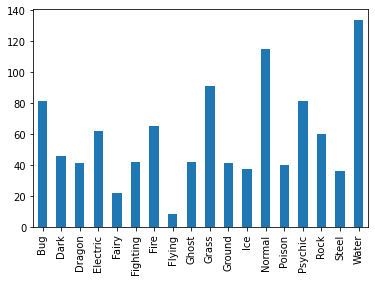

In [ ]:
df1['type_1'].value_counts().sort_index().plot.bar()

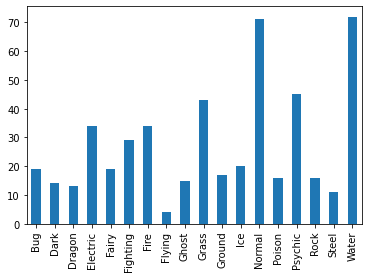

In [ ]:
df2['type_1'].value_counts().sort_index().plot.bar()

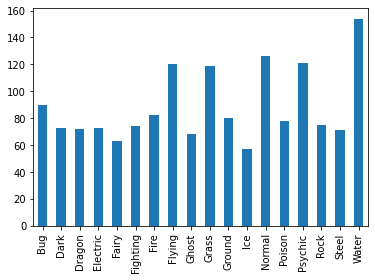

In [ ]:
df3['type_1'].value_counts().sort_index().plot.bar()

Drop types from dataset

In [ ]:
dropmask = (df1['type_1'] == 'Flying')
df1  = df1[~dropmask]
dropmask = (df1['type_1'] == 'Fairy')
df1  = df1[~dropmask]
dropmask = (df1['type_1'] == 'Dragon')
df1  = df1[~dropmask]
dropmask = (df1['type_1'] == 'Steel')
df1  = df1[~dropmask]
dropmask = (df1['type_1'] == 'Ice')
df1  = df1[~dropmask]
dropmask = (df1['type_1'] == 'Poison')
df1  = df1[~dropmask]
dropmask = (df1['type_1'] == 'Ground')
df1  = df1[~dropmask]
dropmask = (df1['type_1'] == 'Ghost')
df1  = df1[~dropmask]

# **Make 2 versions of each dataset: A (numerical) and B (catergorical)**

There should be 6 datasets total:<br>
df1a, df1b:  dataset #1, 1a is numerical and 1b is categorical<br>
df2a, df2b:  dataset #2, 2a is numerical and 2b is categorical<br>
df3a, df3b:  dataset #3, 3a is numerical and 3b is categorical<br>

**Create the numerical versions of the 3 datasets by converting categorical features to binary via one hot encoding.**

In [ ]:
Y1 = df1.loc[: , ['type_1']] # put class labels into seperate df
Y1

,type_1
0,Grass
1,Grass
2,Grass
3,Grass
4,Fire
...,...
1037,Dark
1038,Electric
1042,Psychic
1043,Psychic


In [ ]:
# converting df1 into df1a
df_r_Binary1 = df1.loc[: , ['status']].astype('category')
df_r_Binary1 = pd.get_dummies(df_r_Binary1)

df_r_Binary2 = df1.loc[: , ['egg_type_1']].astype('category')
df_r_Binary2 = pd.get_dummies(df_r_Binary2)

df_r_Binary3 = df1.loc[: , ['growth_rate']].astype('category')
df_r_Binary3 = pd.get_dummies(df_r_Binary3)

df1a = df1.drop(['status','egg_type_1','growth_rate'], axis=1).join(df_r_Binary1).join(df_r_Binary2).join(df_r_Binary3)
df1a # number of columns increased from 16 --> 38 because 3 categorical columns have been split into binary columns

,type_1,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_experience,egg_cycles,status_Legendary,status_Mythical,status_Normal,status_Sub Legendary,egg_type_1_Amorphous,egg_type_1_Bug,egg_type_1_Ditto,egg_type_1_Dragon,egg_type_1_Fairy,egg_type_1_Field,egg_type_1_Flying,egg_type_1_Grass,egg_type_1_Human-Like,egg_type_1_Mineral,egg_type_1_Monster,egg_type_1_Undiscovered,egg_type_1_Water 1,egg_type_1_Water 2,egg_type_1_Water 3,growth_rate_Erratic,growth_rate_Fast,growth_rate_Fluctuating,growth_rate_Medium Fast,growth_rate_Medium Slow,growth_rate_Slow
0,Grass,0.7,6.9,318,45,49,49,65,65,45,45,64,20,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,Grass,1.0,13.0,405,60,62,63,80,80,60,45,142,20,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,Grass,2.0,100.0,525,80,82,83,100,100,80,45,236,20,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,Grass,2.4,155.5,625,80,100,123,122,120,80,45,281,20,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,Fire,0.6,8.5,309,39,52,43,60,50,65,45,62,20,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,Dark,1.8,70.0,600,105,120,105,70,95,105,3,300,120,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1038,Electric,1.2,145.0,580,80,100,50,100,50,200,3,290,120,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1042,Psychic,1.1,7.7,500,100,80,80,80,80,80,3,250,120,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1043,Psychic,2.4,809.1,680,100,165,150,85,130,50,3,340,120,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [ ]:
df1a = df1a.drop(['type_1'], axis=1)

In [ ]:
Y2 = df2.loc[: , ['type_1']]
Y2

,type_1
4,Fire
5,Fire
9,Water
10,Water
11,Water
...,...
1034,Fighting
1038,Electric
1039,Dragon
1040,Ice


In [ ]:
# converting df2 into df2a
df_r_Binary1 = df2.loc[: , ['status']].astype('category')
df_r_Binary1 = pd.get_dummies(df_r_Binary1)

df_r_Binary2 = df2.loc[: , ['egg_type_1']].astype('category')
df_r_Binary2 = pd.get_dummies(df_r_Binary2)

df_r_Binary3 = df2.loc[: , ['growth_rate']].astype('category')
df_r_Binary3 = pd.get_dummies(df_r_Binary3)

df2a = df2.drop(['status','egg_type_1','growth_rate'], axis=1).join(df_r_Binary1).join(df_r_Binary2).join(df_r_Binary3)
df2a # number of columns increased from 16 --> 38 because 3 categorical columns have been split into binary columns

,type_1,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_experience,egg_cycles,status_Legendary,status_Mythical,status_Normal,status_Sub Legendary,egg_type_1_Amorphous,egg_type_1_Bug,egg_type_1_Ditto,egg_type_1_Dragon,egg_type_1_Fairy,egg_type_1_Field,egg_type_1_Flying,egg_type_1_Grass,egg_type_1_Human-Like,egg_type_1_Mineral,egg_type_1_Monster,egg_type_1_Undiscovered,egg_type_1_Water 1,egg_type_1_Water 2,egg_type_1_Water 3,growth_rate_Erratic,growth_rate_Fast,growth_rate_Fluctuating,growth_rate_Medium Fast,growth_rate_Medium Slow,growth_rate_Slow
4,Fire,0.6,8.5,309,39,52,43,60,50,65,45,62,20,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,Fire,1.1,19.0,405,58,64,58,80,65,80,45,142,20,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9,Water,0.5,9.0,314,44,48,65,50,64,43,45,63,20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
10,Water,1.0,22.5,405,59,63,80,65,80,58,45,142,20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
11,Water,1.6,85.5,530,79,83,100,85,105,78,45,239,20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,Fighting,0.6,12.0,385,60,90,60,53,50,72,3,77,120,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1038,Electric,1.2,145.0,580,80,100,50,100,50,200,3,290,120,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1039,Dragon,2.1,200.0,580,200,100,50,100,50,80,3,290,120,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1040,Ice,2.2,800.0,580,100,145,130,65,110,30,3,290,120,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [ ]:
df2a = df2a.drop(['type_1'], axis=1)

In [ ]:
Y3 = df3.loc[: , ['type_1']]
Y3

,type_1
0,Grass
1,Grass
2,Grass
3,Grass
4,Fire
...,...
1591,Water
1592,Grass
1593,Grass
1594,Ice


In [ ]:
# converting df3 into df3a
df_r_Binary1 = df3.loc[: , ['status']].astype('category')
df_r_Binary1 = pd.get_dummies(df_r_Binary1)

df_r_Binary2 = df3.loc[: , ['egg_type_1']].astype('category')
df_r_Binary2 = pd.get_dummies(df_r_Binary2)

df_r_Binary3 = df3.loc[: , ['growth_rate']].astype('category')
df_r_Binary3 = pd.get_dummies(df_r_Binary3)

df3a = df3.drop(['status','egg_type_1','growth_rate'], axis=1).join(df_r_Binary1).join(df_r_Binary2).join(df_r_Binary3)
df3a # number of columns increased from 16 --> 38 because 3 categorical columns have been split into binary columns

,type_1,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_experience,egg_cycles,status_Legendary,status_Mythical,status_Normal,status_Sub Legendary,egg_type_1_Amorphous,egg_type_1_Bug,egg_type_1_Ditto,egg_type_1_Dragon,egg_type_1_Fairy,egg_type_1_Field,egg_type_1_Flying,egg_type_1_Grass,egg_type_1_Human-Like,egg_type_1_Mineral,egg_type_1_Monster,egg_type_1_Undiscovered,egg_type_1_Water 1,egg_type_1_Water 2,egg_type_1_Water 3,growth_rate_Erratic,growth_rate_Fast,growth_rate_Fluctuating,growth_rate_Medium Fast,growth_rate_Medium Slow,growth_rate_Slow
0,Grass,0.7,6.9,318,45,49,49,65,65,45,45,64,20,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,Grass,1.0,13.0,405,60,62,63,80,80,60,45,142,20,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,Grass,2.0,100.0,525,80,82,83,100,100,80,45,236,20,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,Grass,2.4,155.5,625,80,100,123,122,120,80,45,281,20,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,Fire,0.6,8.5,309,39,52,43,60,50,65,45,62,20,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,Water,1.9,105.0,550,100,130,100,63,60,97,3,275,120,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1592,Grass,1.8,70.0,600,105,120,105,70,95,105,3,300,120,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1593,Grass,1.1,7.7,500,100,80,80,80,80,80,3,250,120,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1594,Ice,2.4,809.1,680,100,165,150,85,130,50,3,340,120,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [ ]:
df3a = df3a.drop(['type_1'], axis=1)

**Create the categorical versions of the 3 datasets by binning numerical values into categorical bins.**

# **DF1B**

**Height:**

In [ ]:
def check_outliers(x):
  q25 = x.quantile(.25)
  q75 = x.quantile(.75)
  IQR = q75-q25
  l = q25 - IQR*2
  u = q75 + IQR*2
  return l, u

In [ ]:
lower, upper = check_outliers(df1['height_m'])
print(f'lower = {lower}, upper={upper}')

lower = -1.5, upper=3.5


In [ ]:
mask_lower = df1['height_m']< lower

In [ ]:
mask_upper = df1['height_m']>upper

In [ ]:
#let's replace these outliers with upper boundary.
df1['new_height_m']= df1['height_m']
for i in df1[mask_upper].index:
  df1.loc[i,'new_height_m']=upper

In [ ]:
df1['height_m_bin_ef'] = pd.qcut(df1['new_height_m'],4)
df1['height_m_bin_ef'].describe()

count            777
unique             4
top       (0.5, 1.0]
freq             222
Name: height_m_bin_ef, dtype: object

**Weight**

In [ ]:
lower, upper = check_outliers(df1['weight_kg'])
print(f'lower = {lower}, upper={upper}')

lower = -95.49999999999999, upper=165.0


In [ ]:
mask_lower = df1['weight_kg']< lower

In [ ]:
mask_upper = df1['weight_kg']>upper

In [ ]:
#let's replace these outliers with upper boundary.
df1['new_weight_kg']= df1['weight_kg']
for i in df1[mask_upper].index:
  df1.loc[i,'new_weight_kg']=upper

In [ ]:
#EF binning should be best for this one as well bc of the skewed data
df1['weight_kg_bin_ef'] = pd.qcut(df1['new_weight_kg'],4)

**HP**

In [ ]:
lower, upper = check_outliers(df1['hp'])
print(f'lower = {lower}, upper={upper}')

lower = -10.0, upper=140.0


In [ ]:
mask_lower = df1['hp']< lower

In [ ]:
mask_upper = df1['hp']>upper

In [ ]:
#let's replace these outliers with upper boundary.
df1['new_hp']= df1['hp']
for i in df1[mask_upper].index:
  df1.loc[i,'new_hp']=upper

In [ ]:
#EF binning should be best for this one as well bc of the skewed data
df1['hp_bin_ef'] = pd.qcut(df1['new_hp'],6)

**Attack:**

In [ ]:
lower, upper = check_outliers(df1['attack'])
print(f'lower = {lower}, upper={upper}')

lower = -35.0, upper=190.0


In [ ]:
mask_lower = df1['attack']< lower

In [ ]:
mask_upper = df1['attack']>upper 

In [ ]:
#EF binning should be best for this one as well bc of the skewed data
df1['attack_bin_ef'] = pd.qcut(df1['attack'],6)

**Defense**

In [ ]:
lower, upper = check_outliers(df1['defense'])
print(f'lower = {lower}, upper={upper}')

lower = -30.0, upper=170.0


In [ ]:
mask_lower = df1['defense']< lower

In [ ]:
mask_upper = df1['defense']>upper

In [ ]:
#let's replace these outliers with upper boundary.
df1['new_defense']= df1['defense']
for i in df1[mask_upper].index:
  df1.loc[i,'new_defense']=upper

In [ ]:
#EF binning should be best for this one as well bc of the skewed data
df1['defense_bin_ef'] = pd.qcut(df1['new_defense'],6)

**sp_attack**

In [ ]:
lower, upper = check_outliers(df1['sp_attack'])
print(f'lower = {lower}, upper={upper}')

lower = -40.0, upper=185.0


In [ ]:
mask_lower = df1['sp_attack']< lower

In [ ]:
mask_upper = df1['sp_attack']>upper

In [ ]:
#let's replace these outliers with upper boundary.
df1['new_sp_attack']= df1['sp_attack']
for i in df1[mask_upper].index:
  df1.loc[i,'new_sp_attack']=upper

In [ ]:
#EF binning should be best for this one as well bc of the skewed data
df1['sp_attack_bin_ef'] = pd.qcut(df1['new_sp_attack'],6)

**sp_defense**

In [ ]:
lower, upper = check_outliers(df1['sp_defense'])
print(f'lower = {lower}, upper={upper}')

lower = -30.0, upper=170.0


In [ ]:
mask_lower = df1['sp_defense']< lower

In [ ]:
mask_upper = df1['sp_defense']>upper

In [ ]:
#let's replace these outliers with upper boundary.
df1['new_sp_defense']= df1['sp_defense']
for i in df1[mask_upper].index:
  df1.loc[i,'new_sp_defense']=upper

In [ ]:
#EF binning should be best for this one as well bc of the skewed data
df1['sp_defense_bin_ef'] = pd.qcut(df1['new_sp_defense'],6)

**speed**

In [ ]:
lower, upper = check_outliers(df1['speed'])
print(f'lower = {lower}, upper={upper}')

lower = -45.0, upper=180.0


In [ ]:
mask_lower = df1['speed']< lower

In [ ]:
mask_upper = df1['speed']>upper

In [ ]:
#let's replace these outliers with upper boundary.
df1['new_speed']= df1['speed']
for i in df1[mask_upper].index:
  df1.loc[i,'new_speed']=upper

In [ ]:
#EF binning should be best for this one as well bc of the skewed data
df1['speed_bin_ef'] = pd.qcut(df1['new_speed'],6)

**total_points**

In [ ]:
lower, upper = check_outliers(df1['total_points'])
print(f'lower = {lower}, upper={upper}')

lower = -30.0, upper=870.0


In [ ]:
mask_lower = df1['total_points']< lower

In [ ]:
mask_upper = df1['total_points']>upper

In [ ]:
#EF binning should be best for this one as well bc of the skewed data
df1['total_points_bin_ef'] = pd.qcut(df1['total_points'],6)

**catch_rate**

In [ ]:
lower, upper = check_outliers(df1['catch_rate'])
print(f'lower = {lower}, upper={upper}')

lower = -165.0, upper=360.0


In [ ]:
mask_lower = df1['catch_rate']< lower

In [ ]:
mask_upper = df1['catch_rate']>upper

In [ ]:
#EF binning should be best for this one as well bc of the skewed data
df1['catch_rate_bin_ef'] = pd.qcut(df1['catch_rate'],4)

**base_experience**

In [ ]:
lower, upper = check_outliers(df1['base_experience'])
print(f'lower = {lower}, upper={upper}')

lower = -174.0, upper=431.0


In [ ]:
mask_lower = df1['base_experience']< lower

In [ ]:
mask_upper = df1['base_experience']>upper

In [ ]:
#let's replace these outliers with upper boundary.
df1['new_base_experience']= df1['base_experience']
for i in df1[mask_upper].index:
  df1.loc[i,'new_base_experience']=upper

In [ ]:
#EF binning should be best for this one as well bc of the skewed data
df1['base_experience_bin_ef'] = pd.qcut(df1['new_base_experience'],6)

**egg_cycles**

In [ ]:
lower, upper = check_outliers(df1['egg_cycles'])
print(f'lower = {lower}, upper={upper}')

lower = 20.0, upper=20.0


In [ ]:
mask_lower = df1['egg_cycles']< lower

In [ ]:
mask_upper = df1['egg_cycles']>upper

In [ ]:
#let's replace these outliers with upper boundary.
df1['new_egg_cycles']= df1['egg_cycles']
for i in df1[mask_upper].index:
  df1.loc[i,'new_egg_cycles']=upper
for i in df1[mask_lower].index:
  df1.loc[i,'new_egg_cycles']=lower

In [ ]:
df1['egg_cycles_bin_ew'] = pd.cut(df1['new_egg_cycles'],3)

**removing unneeded columns**

In [ ]:
df1b = df1.drop(labels=['height_m', 'weight_kg', 'total_points', 'hp',
        'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'catch_rate',
       'base_experience', 'egg_cycles', 'new_height_m', 'new_weight_kg', 'new_hp',
       'new_defense', 'new_sp_attack', 'new_sp_defense', 'new_speed',
       'new_base_experience', 'new_egg_cycles'], axis = 1)

In [ ]:
df1b

,status,type_1,growth_rate,egg_type_1,height_m_bin_ef,weight_kg_bin_ef,hp_bin_ef,attack_bin_ef,defense_bin_ef,sp_attack_bin_ef,sp_defense_bin_ef,speed_bin_ef,total_points_bin_ef,catch_rate_bin_ef,base_experience_bin_ef,egg_cycles_bin_ew
0,Normal,Grass,Medium Slow,Grass,"(0.5, 1.0]","(0.099, 8.7]","(0.999, 45.0]","(48.0, 62.0]","(45.0, 55.0]","(55.0, 66.0]","(55.667, 70.0]","(40.0, 55.0]","(305.0, 381.333]","(2.999, 45.0]","(62.0, 118.667]","(19.993, 20.007]"
1,Normal,Grass,Medium Slow,Grass,"(0.5, 1.0]","(8.7, 27.3]","(59.0, 65.0]","(48.0, 62.0]","(55.0, 68.0]","(66.0, 85.0]","(70.0, 80.0]","(55.0, 67.0]","(381.333, 454.0]","(2.999, 45.0]","(118.667, 159.0]","(19.993, 20.007]"
2,Normal,Grass,Medium Slow,Grass,"(1.5, 3.5]","(60.8, 165.0]","(75.0, 90.0]","(75.0, 90.0]","(80.0, 100.0]","(85.0, 103.667]","(95.667, 170.0]","(67.0, 83.0]","(490.0, 534.0]","(2.999, 45.0]","(175.0, 238.667]","(19.993, 20.007]"
3,Normal,Grass,Medium Slow,Grass,"(1.5, 3.5]","(60.8, 165.0]","(75.0, 90.0]","(90.0, 110.0]","(100.0, 170.0]","(103.667, 185.0]","(95.667, 170.0]","(67.0, 83.0]","(534.0, 780.0]","(2.999, 45.0]","(238.667, 431.0]","(19.993, 20.007]"
4,Normal,Fire,Medium Slow,Dragon,"(0.5, 1.0]","(0.099, 8.7]","(0.999, 45.0]","(48.0, 62.0]","(4.999, 45.0]","(55.0, 66.0]","(45.0, 55.667]","(55.0, 67.0]","(305.0, 381.333]","(2.999, 45.0]","(35.999, 62.0]","(19.993, 20.007]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,Mythical,Dark,Slow,Undiscovered,"(1.5, 3.5]","(60.8, 165.0]","(90.0, 140.0]","(110.0, 190.0]","(100.0, 170.0]","(66.0, 85.0]","(80.0, 95.667]","(100.0, 180.0]","(534.0, 780.0]","(2.999, 45.0]","(238.667, 431.0]","(19.993, 20.007]"
1038,Sub Legendary,Electric,Slow,Undiscovered,"(1.0, 1.5]","(60.8, 165.0]","(75.0, 90.0]","(90.0, 110.0]","(45.0, 55.0]","(85.0, 103.667]","(45.0, 55.667]","(100.0, 180.0]","(534.0, 780.0]","(2.999, 45.0]","(238.667, 431.0]","(19.993, 20.007]"
1042,Legendary,Psychic,Slow,Undiscovered,"(1.0, 1.5]","(0.099, 8.7]","(90.0, 140.0]","(75.0, 90.0]","(68.0, 80.0]","(66.0, 85.0]","(70.0, 80.0]","(67.0, 83.0]","(490.0, 534.0]","(2.999, 45.0]","(238.667, 431.0]","(19.993, 20.007]"
1043,Legendary,Psychic,Slow,Undiscovered,"(1.5, 3.5]","(60.8, 165.0]","(90.0, 140.0]","(110.0, 190.0]","(100.0, 170.0]","(66.0, 85.0]","(95.667, 170.0]","(40.0, 55.0]","(534.0, 780.0]","(2.999, 45.0]","(238.667, 431.0]","(19.993, 20.007]"


# **DF2B**

**Height:**

In [ ]:
lower, upper = check_outliers(df2['height_m'])
print(f'lower = {lower}, upper={upper}')

lower = -1.2999999999999998, upper=3.1999999999999997


In [ ]:
mask_lower = df2['height_m']< lower

In [ ]:
mask_upper = df2['height_m']>upper

In [ ]:
#let's replace these outliers with upper boundary.
df2['new_height_m']= df2['height_m']
for i in df2[mask_upper].index:
  df2.loc[i,'new_height_m']=upper

In [ ]:
df2['height_m_bin_ef'] = pd.qcut(df2['new_height_m'],4)

**Weight**

In [ ]:
lower, upper = check_outliers(df2['weight_kg'])
print(f'lower = {lower}, upper={upper}')

lower = -82.325, upper=143.425


In [ ]:
mask_lower = df2['weight_kg']< lower

In [ ]:
mask_upper = df2['weight_kg']>upper

In [ ]:
#let's replace these outliers with upper boundary.
df2['new_weight_kg']= df2['weight_kg']
for i in df2[mask_upper].index:
  df2.loc[i,'new_weight_kg']=upper

In [ ]:
#EF binning should be best for this one as well bc of the skewed data
df2['weight_kg_bin_ef'] = pd.qcut(df2['new_weight_kg'],4)

**HP**

In [ ]:
lower, upper = check_outliers(df2['hp'])
print(f'lower = {lower}, upper={upper}')

lower = -8.0, upper=137.0


In [ ]:
mask_lower = df2['hp']< lower

In [ ]:
mask_upper = df2['hp']>upper 

In [ ]:
#let's replace these outliers with upper boundary.
df2['new_hp']= df2['hp']
for i in df2[mask_upper].index:
  df2.loc[i,'new_hp']=upper

In [ ]:
#EF binning should be best for this one as well bc of the skewed data
df2['hp_bin_ef'] = pd.qcut(df2['new_hp'],6)

**Attack:**

In [ ]:
lower, upper = check_outliers(df2['attack'])
print(f'lower = {lower}, upper={upper}')

lower = -32.0, upper=180.5


In [ ]:
mask_lower = df2['attack']< lower

In [ ]:
mask_upper = df2['attack']>upper

In [ ]:
#EF binning should be best for this one as well bc of the skewed data
df2['attack_bin_ef'] = pd.qcut(df2['attack'],6)

**Defense**

In [ ]:
lower, upper = check_outliers(df2['defense'])
print(f'lower = {lower}, upper={upper}')

lower = -11.0, upper=141.5


In [ ]:
mask_lower = df2['defense']< lower

In [ ]:
mask_upper = df2['defense']>upper

In [ ]:
#let's replace these outliers with upper boundary.
df2['new_defense']= df2['defense']
for i in df2[mask_upper].index:
  df2.loc[i,'new_defense']=upper

In [ ]:
#EF binning should be best for this one as well bc of the skewed data
df2['defense_bin_ef'] = pd.qcut(df2['new_defense'],6)

**sp_attack**

In [ ]:
lower, upper = check_outliers(df2['sp_attack'])
print(f'lower = {lower}, upper={upper}')

lower = -35.0, upper=165.0


In [ ]:
mask_lower = df2['sp_attack']< lower

In [ ]:
mask_upper = df2['sp_attack']>upper

In [ ]:
#let's replace these outliers with upper boundary.
df2['new_sp_attack']= df2['sp_attack']
for i in df2[mask_upper].index:
  df2.loc[i,'new_sp_attack']=upper

In [ ]:
#EF binning should be best for this one as well bc of the skewed data
df2['sp_attack_bin_ef'] = pd.qcut(df2['new_sp_attack'],6)

**sp_defense**

In [ ]:
lower, upper = check_outliers(df2['sp_defense'])
print(f'lower = {lower}, upper={upper}')

lower = -20.75, upper=155.5


In [ ]:
mask_lower = df2['sp_defense']< lower

In [ ]:
mask_upper = df2['sp_defense']>upper

In [ ]:
#let's replace these outliers with upper boundary.
df2['new_sp_defense']= df2['sp_defense']
for i in df2[mask_upper].index:
  df2.loc[i,'new_sp_defense']=upper

In [ ]:
#EF binning should be best for this one as well bc of the skewed data
df2['sp_defense_bin_ef'] = pd.qcut(df2['new_sp_defense'],6)

**speed**

In [ ]:
lower, upper = check_outliers(df2['speed'])
print(f'lower = {lower}, upper={upper}')

lower = -36.75, upper=167.0


In [ ]:
mask_lower = df2['speed']< lower

In [ ]:
mask_upper = df2['speed']>upper

In [ ]:
#let's replace these outliers with upper boundary.
df2['new_speed']= df2['speed']
for i in df2[mask_upper].index:
  df2.loc[i,'new_speed']=upper

In [ ]:
#EF binning should be best for this one as well bc of the skewed data
df2['speed_bin_ef'] = pd.qcut(df2['new_speed'],6)

**total_points**

In [ ]:
lower, upper = check_outliers(df2['total_points'])
print(f'lower = {lower}, upper={upper}')

lower = -60.0, upper=865.0


In [ ]:
mask_lower = df2['total_points']< lower

In [ ]:
mask_upper = df2['total_points']>upper

In [ ]:
#EF binning should be best for this one as well bc of the skewed data
df2['total_points_bin_ef'] = pd.qcut(df2['total_points'],6)

**catch_rate**

In [ ]:
lower, upper = check_outliers(df2['catch_rate'])
print(f'lower = {lower}, upper={upper}')

lower = -245.0, upper=480.0


In [ ]:
mask_lower = df2['catch_rate']< lower

In [ ]:
mask_upper = df2['catch_rate']>upper

In [ ]:
#EF binning should be best for this one as well bc of the skewed data
df2['catch_rate_bin_ef'] = pd.qcut(df2['catch_rate'],4)

**base_experience**

In [ ]:
lower, upper = check_outliers(df2['base_experience'])
print(f'lower = {lower}, upper={upper}')

lower = -161.0, upper=399.0


In [ ]:
mask_lower = df2['base_experience']< lower

In [ ]:
mask_upper = df2['base_experience']>upper

In [ ]:
#let's replace these outliers with upper boundary.
df2['new_base_experience']= df2['base_experience']
for i in df2[mask_upper].index:
  df2.loc[i,'new_base_experience']=upper

In [ ]:
#EF binning should be best for this one as well bc of the skewed data
df2['base_experience_bin_ef'] = pd.qcut(df2['new_base_experience'],6)

**egg_cycles**

In [ ]:
lower, upper = check_outliers(df2['egg_cycles'])
print(f'lower = {lower}, upper={upper}')

lower = 10.0, upper=35.0


In [ ]:
mask_lower = df2['egg_cycles']< lower

In [ ]:
mask_upper = df2['egg_cycles']>upper

In [ ]:
#let's replace these outliers with upper boundary.
df2['new_egg_cycles']= df2['egg_cycles']
for i in df2[mask_upper].index:
  df2.loc[i,'new_egg_cycles']=upper
for i in df2[mask_lower].index:
  df2.loc[i,'new_egg_cycles']=lower

In [ ]:
df2['egg_cycles_bin_ew'] = pd.cut(df2['new_egg_cycles'],3)

**removing unneeded columns**

In [ ]:
df2 = df2.drop(labels=['new_height_m', 'new_weight_kg', 'new_hp',
       'new_defense', 'new_sp_attack', 'new_sp_defense', 'new_speed',
       'new_base_experience', 'new_egg_cycles'], axis = 1)
df2b = df2.drop(labels=['height_m', 'weight_kg', 'total_points', 'hp',
        'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'catch_rate',
       'base_experience', 'egg_cycles'], axis = 1)

In [ ]:
df2b

,status,type_1,growth_rate,egg_type_1,height_m_bin_ef,weight_kg_bin_ef,hp_bin_ef,attack_bin_ef,defense_bin_ef,sp_attack_bin_ef,sp_defense_bin_ef,speed_bin_ef,total_points_bin_ef,catch_rate_bin_ef,base_experience_bin_ef,egg_cycles_bin_ew
4,Normal,Fire,Medium Slow,Dragon,"(0.5, 0.8]","(7.975, 23.4]","(9.999, 45.0]","(46.833, 60.0]","(42.833, 55.0]","(50.0, 62.0]","(41.833, 53.0]","(63.0, 78.0]","(295.0, 330.0]","(2.999, 45.0]","(60.0, 68.667]","(18.333, 26.667]"
5,Normal,Fire,Medium Slow,Dragon,"(0.8, 1.4]","(7.975, 23.4]","(55.0, 65.0]","(60.0, 71.5]","(55.0, 64.0]","(75.0, 95.0]","(63.0, 75.0]","(78.0, 95.0]","(330.0, 420.0]","(2.999, 45.0]","(68.667, 145.0]","(18.333, 26.667]"
9,Normal,Water,Medium Slow,Monster,"(0.099, 0.5]","(7.975, 23.4]","(9.999, 45.0]","(46.833, 60.0]","(64.0, 75.0]","(40.0, 50.0]","(63.0, 75.0]","(35.0, 50.0]","(295.0, 330.0]","(2.999, 45.0]","(60.0, 68.667]","(18.333, 26.667]"
10,Normal,Water,Medium Slow,Monster,"(0.8, 1.4]","(7.975, 23.4]","(55.0, 65.0]","(60.0, 71.5]","(75.0, 95.0]","(62.0, 75.0]","(75.0, 90.0]","(50.0, 63.0]","(330.0, 420.0]","(2.999, 45.0]","(68.667, 145.0]","(18.333, 26.667]"
11,Normal,Water,Medium Slow,Monster,"(1.4, 3.2]","(53.125, 143.425]","(73.333, 88.333]","(71.5, 85.0]","(95.0, 141.5]","(75.0, 95.0]","(90.0, 155.5]","(63.0, 78.0]","(525.0, 780.0]","(2.999, 45.0]","(216.167, 399.0]","(18.333, 26.667]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,Sub Legendary,Fighting,Slow,Undiscovered,"(0.5, 0.8]","(7.975, 23.4]","(55.0, 65.0]","(85.0, 105.0]","(55.0, 64.0]","(50.0, 62.0]","(41.833, 53.0]","(63.0, 78.0]","(330.0, 420.0]","(2.999, 45.0]","(68.667, 145.0]","(26.667, 35.0]"
1038,Sub Legendary,Electric,Slow,Undiscovered,"(0.8, 1.4]","(53.125, 143.425]","(73.333, 88.333]","(85.0, 105.0]","(42.833, 55.0]","(95.0, 165.0]","(41.833, 53.0]","(95.0, 167.0]","(525.0, 780.0]","(2.999, 45.0]","(216.167, 399.0]","(26.667, 35.0]"
1039,Sub Legendary,Dragon,Slow,Undiscovered,"(1.4, 3.2]","(53.125, 143.425]","(88.333, 137.0]","(85.0, 105.0]","(42.833, 55.0]","(95.0, 165.0]","(41.833, 53.0]","(78.0, 95.0]","(525.0, 780.0]","(2.999, 45.0]","(216.167, 399.0]","(26.667, 35.0]"
1040,Sub Legendary,Ice,Slow,Undiscovered,"(1.4, 3.2]","(53.125, 143.425]","(88.333, 137.0]","(105.0, 180.0]","(95.0, 141.5]","(62.0, 75.0]","(90.0, 155.5]","(4.999, 35.0]","(525.0, 780.0]","(2.999, 45.0]","(216.167, 399.0]","(26.667, 35.0]"


# **DF3B**

**Height:**

In [ ]:
lower, upper = check_outliers(df3['height_m'])
print(f'lower = {lower}, upper={upper}')

lower = -1.4, upper=3.6


In [ ]:
mask_lower = df3['height_m']< lower

In [ ]:
mask_upper = df3['height_m']>upper

In [ ]:
#let's replace these outliers with upper boundary.
df3['new_height_m']= df3['height_m']
for i in df3[mask_upper].index:
  df3.loc[i,'new_height_m']=upper

In [ ]:
df3['height_m_bin_ef'] = pd.qcut(df3['new_height_m'],4)

**Weight**

In [ ]:
lower, upper = check_outliers(df3['weight_kg'])
print(f'lower = {lower}, upper={upper}')

lower = -127.6, upper=215.14999999999998


In [ ]:
mask_lower = df3['weight_kg']< lower

In [ ]:
mask_upper = df3['weight_kg']>upper

In [ ]:
#let's replace these outliers with upper boundary.
df3['new_weight_kg']= df3['weight_kg']
for i in df3[mask_upper].index:
  df3.loc[i,'new_weight_kg']=upper

In [ ]:
#EF binning should be best for this one as well bc of the skewed data
df3['weight_kg_bin_ef'] = pd.qcut(df3['new_weight_kg'],4)

**HP**

In [ ]:
lower, upper = check_outliers(df3['hp'])
print(f'lower = {lower}, upper={upper}')

lower = -8.75, upper=147.5


In [ ]:
mask_lower = df3['hp']< lower

In [ ]:
mask_upper = df3['hp']>upper

In [ ]:
#let's replace these outliers with upper boundary.
df3['new_hp']= df3['hp']
for i in df3[mask_upper].index:
  df3.loc[i,'new_hp']=upper

In [ ]:
#EF binning should be best for this one as well bc of the skewed data
df3['hp_bin_ef'] = pd.qcut(df3['new_hp'],6)

**Attack:**

In [ ]:
lower, upper = check_outliers(df3['attack'])
print(f'lower = {lower}, upper={upper}')

lower = -23.0, upper=182.0


In [ ]:
mask_lower = df3['attack']< lower

In [ ]:
mask_upper = df3['attack']>upper

In [ ]:
#EF binning should be best for this one as well bc of the skewed data
df3['attack_bin_ef'] = pd.qcut(df3['attack'],6)

**Defense**

In [ ]:
lower, upper = check_outliers(df3['defense'])
print(f'lower = {lower}, upper={upper}')

lower = -28.0, upper=177.0


In [ ]:
mask_lower = df3['defense']< lower

In [ ]:
mask_upper = df3['defense']>upper

In [ ]:
#let's replace these outliers with upper boundary.
df3['new_defense']= df3['defense']
for i in df3[mask_upper].index:
  df3.loc[i,'new_defense']=upper

In [ ]:
#EF binning should be best for this one as well bc of the skewed data
df3['defense_bin_ef'] = pd.qcut(df3['new_defense'],6)

**sp_attack**

In [ ]:
lower, upper = check_outliers(df3['sp_attack'])
print(f'lower = {lower}, upper={upper}')

lower = -40.0, upper=185.0


In [ ]:
mask_lower = df3['sp_attack']< lower

In [ ]:
mask_upper = df3['sp_attack']>upper

In [ ]:
#let's replace these outliers with upper boundary.
df3['new_sp_attack']= df3['sp_attack']
for i in df3[mask_upper].index:
  df3.loc[i,'new_sp_attack']=upper

In [ ]:
#EF binning should be best for this one as well bc of the skewed data
df3['sp_attack_bin_ef'] = pd.qcut(df3['new_sp_attack'],6)

**sp_defense**

In [ ]:
lower, upper = check_outliers(df3['sp_defense'])
print(f'lower = {lower}, upper={upper}')

lower = -21.0, upper=164.0


In [ ]:
mask_lower = df3['sp_defense']< lower

In [ ]:
mask_upper = df3['sp_defense']>upper

In [ ]:
#let's replace these outliers with upper boundary.
df3['new_sp_defense']= df3['sp_defense']
for i in df3[mask_upper].index:
  df3.loc[i,'new_sp_defense']=upper

In [ ]:
#EF binning should be best for this one as well bc of the skewed data
df3['sp_defense_bin_ef'] = pd.qcut(df3['new_sp_defense'],6)

**speed**

In [ ]:
lower, upper = check_outliers(df3['speed'])
print(f'lower = {lower}, upper={upper}')

lower = -47.0, upper=183.0


In [ ]:
mask_lower = df3['speed']< lower

In [ ]:
mask_upper = df3['speed']>upper

In [ ]:
#let's replace these outliers with upper boundary.
df3['new_speed']= df3['speed']
for i in df3[mask_upper].index:
  df3.loc[i,'new_speed']=upper

In [ ]:
#EF binning should be best for this one as well bc of the skewed data
df3['speed_bin_ef'] = pd.qcut(df3['new_speed'],6)

**total_points**

In [ ]:
lower, upper = check_outliers(df3['total_points'])
print(f'lower = {lower}, upper={upper}')

lower = -20.0, upper=880.0


In [ ]:
mask_lower = df3['total_points']< lower

In [ ]:
mask_upper = df3['total_points']>upper

In [ ]:
#EF binning should be best for this one as well bc of the skewed data
df3['total_points_bin_ef'] = pd.qcut(df3['total_points'],6)

**catch_rate**

In [ ]:
lower, upper = check_outliers(df3['catch_rate'])
print(f'lower = {lower}, upper={upper}')

lower = -105.0, upper=270.0


In [ ]:
mask_lower = df3['catch_rate']< lower

In [ ]:
mask_upper = df3['catch_rate']>upper

In [ ]:
#EF binning should be best for this one as well bc of the skewed data
df3['catch_rate_bin_ef'] = pd.qcut(df3['catch_rate'],4)

**base_experience**

In [ ]:
lower, upper = check_outliers(df3['base_experience'])
print(f'lower = {lower}, upper={upper}')

lower = -223.0, upper=512.0


In [ ]:
mask_lower = df3['base_experience']< lower

In [ ]:
mask_upper = df3['base_experience']>upper

In [ ]:
#let's replace these outliers with upper boundary.
df3['new_base_experience']= df3['base_experience']
for i in df3[mask_upper].index:
  df3.loc[i,'new_base_experience']=upper

In [ ]:
#EF binning should be best for this one as well bc of the skewed data
df3['base_experience_bin_ef'] = pd.qcut(df3['new_base_experience'],6)

**egg_cycles**

In [ ]:
lower, upper = check_outliers(df3['egg_cycles'])
print(f'lower = {lower}, upper={upper}')

lower = 10.0, upper=35.0


In [ ]:
mask_lower = df3['egg_cycles']< lower

In [ ]:
mask_upper = df3['egg_cycles']>upper

In [ ]:
#let's replace these outliers with upper boundary.
df3['new_egg_cycles']= df3['egg_cycles']
for i in df3[mask_upper].index:
  df3.loc[i,'new_egg_cycles']=upper
for i in df3[mask_lower].index:
  df3.loc[i,'new_egg_cycles']=lower

In [ ]:
df3['egg_cycles_bin_ew'] = pd.cut(df3['new_egg_cycles'],3)

**removing unneeded columns**

In [ ]:
df3 = df3.drop(labels=['new_height_m', 'new_weight_kg', 'new_hp',
       'new_defense', 'new_sp_attack', 'new_sp_defense', 'new_speed',
       'new_base_experience', 'new_egg_cycles'], axis = 1)
df3b = df3.drop(labels=['height_m', 'weight_kg', 'total_points', 'hp',
        'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'catch_rate',
       'base_experience', 'egg_cycles'], axis = 1)

In [ ]:
df3b

,status,type_1,growth_rate,egg_type_1,height_m_bin_ef,weight_kg_bin_ef,hp_bin_ef,attack_bin_ef,defense_bin_ef,sp_attack_bin_ef,sp_defense_bin_ef,speed_bin_ef,total_points_bin_ef,catch_rate_bin_ef,base_experience_bin_ef,egg_cycles_bin_ew
0,Normal,Grass,Medium Slow,Grass,"(0.6, 1.0]","(0.099, 9.5]","(0.999, 48.0]","(4.999, 50.0]","(48.0, 60.0]","(55.0, 70.0]","(60.0, 70.0]","(40.0, 55.0]","(309.0, 400.0]","(2.999, 45.0]","(62.0, 137.0]","(18.333, 26.667]"
1,Normal,Grass,Medium Slow,Grass,"(0.6, 1.0]","(9.5, 31.5]","(48.0, 60.0]","(50.0, 65.0]","(60.0, 70.0]","(70.0, 85.0]","(70.0, 85.0]","(55.0, 68.0]","(400.0, 470.0]","(2.999, 45.0]","(137.0, 165.0]","(18.333, 26.667]"
2,Normal,Grass,Medium Slow,Grass,"(1.6, 3.6]","(78.05, 215.15]","(78.0, 95.0]","(80.0, 95.0]","(70.0, 85.0]","(85.0, 105.0]","(85.0, 100.0]","(68.0, 84.0]","(500.0, 570.0]","(2.999, 45.0]","(179.0, 248.333]","(18.333, 26.667]"
3,Normal,Grass,Medium Slow,Grass,"(1.6, 3.6]","(78.05, 215.15]","(78.0, 95.0]","(95.0, 115.0]","(105.0, 177.0]","(105.0, 185.0]","(100.0, 164.0]","(68.0, 84.0]","(570.0, 780.0]","(2.999, 45.0]","(248.333, 512.0]","(18.333, 26.667]"
4,Normal,Fire,Medium Slow,Dragon,"(0.099, 0.6]","(0.099, 9.5]","(0.999, 48.0]","(50.0, 65.0]","(4.999, 48.0]","(55.0, 70.0]","(45.0, 60.0]","(55.0, 68.0]","(174.999, 309.0]","(2.999, 45.0]","(35.999, 62.0]","(18.333, 26.667]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,Sub Legendary,Water,Slow,Undiscovered,"(1.6, 3.6]","(78.05, 215.15]","(95.0, 147.5]","(115.0, 190.0]","(85.0, 105.0]","(55.0, 70.0]","(45.0, 60.0]","(84.0, 100.0]","(500.0, 570.0]","(2.999, 45.0]","(248.333, 512.0]","(26.667, 35.0]"
1592,Mythical,Grass,Slow,Undiscovered,"(1.6, 3.6]","(31.5, 78.05]","(95.0, 147.5]","(115.0, 190.0]","(85.0, 105.0]","(55.0, 70.0]","(85.0, 100.0]","(100.0, 183.0]","(570.0, 780.0]","(2.999, 45.0]","(248.333, 512.0]","(26.667, 35.0]"
1593,Legendary,Grass,Slow,Undiscovered,"(1.0, 1.6]","(0.099, 9.5]","(95.0, 147.5]","(65.0, 80.0]","(70.0, 85.0]","(70.0, 85.0]","(70.0, 85.0]","(68.0, 84.0]","(470.0, 500.0]","(2.999, 45.0]","(248.333, 512.0]","(26.667, 35.0]"
1594,Legendary,Ice,Slow,Undiscovered,"(1.6, 3.6]","(78.05, 215.15]","(95.0, 147.5]","(115.0, 190.0]","(105.0, 177.0]","(70.0, 85.0]","(100.0, 164.0]","(40.0, 55.0]","(570.0, 780.0]","(2.999, 45.0]","(248.333, 512.0]","(26.667, 35.0]"


# **DFB Binarizing**

Convert df1b, df2b, df3b categories to one hot encoding

In [ ]:
df1b = df1b.drop(['type_1'], axis = 1)
df2b = df2b.drop(['type_1'], axis = 1)
df3b = df3b.drop(['type_1'], axis = 1)
df1b = pd.get_dummies(df1b)
df2b = pd.get_dummies(df2b)
df3b = pd.get_dummies(df3b)

# **Feature Selection for each dataset variation: df1, df2, df3**

Plug in version A or B of each dataset into a corresponding model to test performance of feature selection

In [ ]:
from sklearn.feature_selection import SelectKBest # You better do this, both rank consistent
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB # 3 different models to see how good these feature selection methods are
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

**Parameters for cross validation and dataset**

In [ ]:
mydf =    df1a # input a X dataframe to copy, options are: df1a, df1b, df2a, df2b, df3a, df3b
mydf2 =   df1b
myY =     Y1   # input a Y dataframe to copy, options are: Y1, Y2, Y3; corresponding to dataset 1,2,3.

my_df = mydf.copy(deep = True)
my_df2 = mydf2.copy(deep = True)
my_y = myY.copy(deep = True)

cv_fold = 10    # input how many folds for cross validation

selected_k  = 23  # k used for feature selection of Dataset A (37 features max)
selected_k2 = selected_k   # k used for feature selection of Dataset B (86 features max)

In [ ]:
# Dictionary for continous values (A) version of dataset
Telco_C = {}
Telco_C['feature_names'] = my_df.columns.values
Telco_C['data'] = my_df.values
Telco_C['target_names'] = my_y['type_1'].unique()
Telco_C['target'] = my_y['type_1'].values

In [ ]:
# Dictionary for categorical values (B) version of dataset
Telco_Binary={}
Telco_Binary['feature_names'] = mydf2.columns.values
Telco_Binary['n_features'] = len(mydf2.columns.values)
Telco_Binary['data'] = mydf2.values
Telco_Binary['target_names'] = my_y['type_1'].unique()
Telco_Binary['target'] = my_y['type_1'].values

Feature select using Chi-Square

In [ ]:
# Selector for version A
selector = SelectKBest(chi2,k=selected_k) # modify k to optimize accuracy score from feature selected models
Telco_C['new_data_chi'] = selector.fit_transform(Telco_C['data'], Telco_C['target']) # new arrays for feature tested version of data
Telco_C['new_feature_names_chi'] = Telco_C['feature_names'][selector.get_support()]

# Selector for version B
selector = SelectKBest(chi2,k=selected_k2) # modify k to optimize accuracy score from feature selected models
Telco_Binary['new_data_chi'] = selector.fit_transform(Telco_Binary['data'], Telco_Binary['target']) # new arrays for feature tested version of data
Telco_Binary['new_feature_names_chi'] = Telco_Binary['feature_names'][selector.get_support()]

Feature select using Mutual Info

In [ ]:
# Selector for version A
selector2 = SelectKBest(mutual_info_classif, k=selected_k)
Telco_C['new_data_mi'] = selector2.fit_transform(Telco_C['data'], Telco_C['target'])
Telco_C['new_features_names_mi']=Telco_C['feature_names'][selector2.get_support()]

# Selector for version B
selector2 = SelectKBest(mutual_info_classif, k=selected_k2)
Telco_Binary['new_data_mi'] = selector2.fit_transform(Telco_Binary['data'], Telco_Binary['target'])
Telco_Binary['new_features_names_mi']=Telco_Binary['feature_names'][selector2.get_support()]

Function to print model testing score

In [ ]:
def print_testing():
  # test on non-feature selected data
  print('No selection')
  # GaussianNB
  NB_G = GaussianNB()
  scores_old = cross_val_score(NB_G, Telco_C['data'], Telco_C['target'],cv=cv_fold, scoring='accuracy')
  print('GaussianNB','           --','Accuracy: %0.2f (+/- %0.2f)' % (scores_old.mean(),scores_old.std()*2))
  # BernoulliNB
  NB_B = BernoulliNB()
  scores_old = cross_val_score(NB_B, Telco_Binary['data'], Telco_Binary['target'],cv=cv_fold, scoring='accuracy')
  print('BernoulliNB','          --','Accuracy: %0.2f (+/- %0.2f)' % (scores_old.mean(),scores_old.std()*2))
  # MultinomialNB
  NB_M = MultinomialNB()
  scores_old = cross_val_score(NB_M, Telco_Binary['data'], Telco_Binary['target'],cv=cv_fold, scoring='accuracy')
  print('MultinomialNB','        --','Accuracy: %0.2f (+/- %0.2f)' % (scores_old.mean(),scores_old.std()*2))
  # Decision Tree Entropy
  DST_E = DecisionTreeClassifier(criterion='entropy')
  scores_old = cross_val_score(DST_E , Telco_C['data'], Telco_C['target'],cv=cv_fold, scoring='accuracy')
  print('Decision Tree Entropy','--','Accuracy: %0.2f (+/- %0.2f)' % (scores_old.mean(),scores_old.std()*2))
  # Decision Tree Gini
  DST_G = DecisionTreeClassifier()
  scores_old = cross_val_score(DST_G , Telco_C['data'], Telco_C['target'],cv=cv_fold, scoring='accuracy')
  print('Decision Tree Gini','   --','Accuracy: %0.2f (+/- %0.2f)' % (scores_old.mean(),scores_old.std()*2))
  # K Nearest Neighbors
  KNN = KNeighborsClassifier()
  scores_old = cross_val_score(KNN , Telco_C['data'], Telco_C['target'],cv=cv_fold, scoring='accuracy')
  print('K Nearest Neighbors','  --','Accuracy: %0.2f (+/- %0.2f)' % (scores_old.mean(),scores_old.std()*2))

  # test feature selected data: Chi2
  print('\nChi-square selection')
  # GaussianNB
  scores_new_c_chi = cross_val_score(NB_G, Telco_C['new_data_chi'], Telco_C['target'],cv=cv_fold, scoring='accuracy')
  print('GaussianNB','           --','Accuracy: %0.2f (+/- %0.2f)' % (scores_new_c_chi.mean(),scores_new_c_chi.std()*2))
  # BernoulliNB
  scores_new_c_chi = cross_val_score(NB_B, Telco_Binary['new_data_chi'], Telco_Binary['target'],cv=cv_fold, scoring='accuracy')
  print('BernoulliNB','          --','Accuracy: %0.2f (+/- %0.2f)' % (scores_new_c_chi.mean(),scores_new_c_chi.std()*2))
  # MultinomialNB
  scores_new_c_chi = cross_val_score(NB_M, Telco_Binary['new_data_chi'], Telco_Binary['target'],cv=cv_fold, scoring='accuracy')
  print('MultinomialNB','        --','Accuracy: %0.2f (+/- %0.2f)' % (scores_new_c_chi.mean(),scores_new_c_chi.std()*2))
  # Decision Tree Entropy
  scores_new_c_chi = cross_val_score(DST_E , Telco_C['new_data_chi'], Telco_C['target'],cv=cv_fold, scoring='accuracy')
  print('Decision Tree Entropy','--','Accuracy: %0.2f (+/- %0.2f)' % (scores_new_c_chi.mean(),scores_new_c_chi.std()*2))
  # Decision Tree Gini
  scores_new_c_chi = cross_val_score(DST_G , Telco_C['new_data_chi'], Telco_C['target'],cv=cv_fold, scoring='accuracy')
  print('Decision Tree Gini','   --','Accuracy: %0.2f (+/- %0.2f)' % (scores_new_c_chi.mean(),scores_new_c_chi.std()*2))
  # K Nearest Neighbors
  scores_new_c_chi = cross_val_score(KNN , Telco_C['new_data_chi'], Telco_C['target'],cv=cv_fold, scoring='accuracy')
  print('K Nearest Neighbors','  --','Accuracy: %0.2f (+/- %0.2f)' % (scores_new_c_chi.mean(),scores_new_c_chi.std()*2))

  # test feature selected data: Mutual Info
  print('\nMutual info classfier selection')
  # GaussianNB
  scores_new_mi = cross_val_score(NB_G, Telco_C['new_data_mi'], Telco_C['target'],cv=cv_fold, scoring='accuracy')
  print('GaussianNB','           --','Accuracy: %0.2f (+/- %0.2f)' % (scores_new_mi.mean(),scores_new_mi.std()*2))
  # BernoulliNB
  scores_new_mi = cross_val_score(NB_B, Telco_Binary['new_data_mi'], Telco_Binary['target'],cv=cv_fold, scoring='accuracy')
  print('BernoulliNB','          --','Accuracy: %0.2f (+/- %0.2f)' % (scores_new_mi.mean(),scores_new_mi.std()*2))
  # MultinomialNB
  scores_new_mi = cross_val_score(NB_M, Telco_Binary['new_data_mi'], Telco_Binary['target'],cv=cv_fold, scoring='accuracy')
  print('MultinomialNB','        --','Accuracy: %0.2f (+/- %0.2f)' % (scores_new_mi.mean(),scores_new_mi.std()*2))
  # Decision Tree Entropy
  scores_new_mi = cross_val_score(DST_E , Telco_C['new_data_mi'], Telco_C['target'],cv=cv_fold, scoring='accuracy')
  print('Decision Tree Entropy','--','Accuracy: %0.2f (+/- %0.2f)' % (scores_new_mi.mean(),scores_new_mi.std()*2))
  # Decision Tree Gini
  scores_new_mi = cross_val_score(DST_G , Telco_C['new_data_mi'], Telco_C['target'],cv=cv_fold, scoring='accuracy')
  print('Decision Tree Gini','   --','Accuracy: %0.2f (+/- %0.2f)' % (scores_new_mi.mean(),scores_new_mi.std()*2))
  # K Nearest Neighbors
  scores_new_mi = cross_val_score(KNN , Telco_C['new_data_mi'], Telco_C['target'],cv=cv_fold, scoring='accuracy')
  print('K Nearest Neighbors','  --','Accuracy: %0.2f (+/- %0.2f)' % (scores_new_mi.mean(),scores_new_mi.std()*2))

  print('\nNo selection B')
  # GaussianNB
  NB_G = GaussianNB()
  scores_old = cross_val_score(NB_G, Telco_Binary['data'], Telco_Binary['target'],cv=cv_fold, scoring='accuracy')
  print('GaussianNB B','           --','Accuracy: %0.2f (+/- %0.2f)' % (scores_old.mean(),scores_old.std()*2))
  # Decision Tree Entropy
  DST_E = DecisionTreeClassifier(criterion='entropy')
  scores_old = cross_val_score(DST_E , Telco_Binary['data'], Telco_Binary['target'],cv=cv_fold, scoring='accuracy')
  print('Decision Tree Entropy B','--','Accuracy: %0.2f (+/- %0.2f)' % (scores_old.mean(),scores_old.std()*2))
  # Decision Tree Gini
  DST_G = DecisionTreeClassifier()
  scores_old = cross_val_score(DST_G , Telco_Binary['data'], Telco_Binary['target'],cv=cv_fold, scoring='accuracy')
  print('Decision Tree Gini B','   --','Accuracy: %0.2f (+/- %0.2f)' % (scores_old.mean(),scores_old.std()*2))
  # K Nearest Neighbors
  KNN = KNeighborsClassifier()
  scores_old = cross_val_score(KNN , Telco_Binary['data'], Telco_Binary['target'],cv=cv_fold, scoring='accuracy')
  print('K Nearest Neighbors B','  --','Accuracy: %0.2f (+/- %0.2f)' % (scores_old.mean(),scores_old.std()*2))

  print('\nChi-square selection B')
  # GaussianNB
  scores_new_c_chi = cross_val_score(NB_G, Telco_Binary['new_data_chi'], Telco_Binary['target'],cv=cv_fold, scoring='accuracy')
  print('GaussianNB B','           --','Accuracy: %0.2f (+/- %0.2f)' % (scores_new_c_chi.mean(),scores_new_c_chi.std()*2))
  # Decision Tree Entropy B
  scores_new_c_chi = cross_val_score(DST_E , Telco_Binary['new_data_chi'], Telco_Binary['target'],cv=cv_fold, scoring='accuracy')
  print('Decision Tree Entropy B','--','Accuracy: %0.2f (+/- %0.2f)' % (scores_new_c_chi.mean(),scores_new_c_chi.std()*2))
  # Decision Tree Gini B
  scores_new_c_chi = cross_val_score(DST_G , Telco_Binary['new_data_chi'], Telco_Binary['target'],cv=cv_fold, scoring='accuracy')
  print('Decision Tree Gini B','   --','Accuracy: %0.2f (+/- %0.2f)' % (scores_new_c_chi.mean(),scores_new_c_chi.std()*2))
  # K Nearest Neighbors B
  scores_new_c_chi = cross_val_score(KNN , Telco_Binary['new_data_chi'], Telco_Binary['target'],cv=cv_fold, scoring='accuracy')
  print('K Nearest Neighbors B','  --','Accuracy: %0.2f (+/- %0.2f)' % (scores_new_c_chi.mean(),scores_new_c_chi.std()*2))

  print('\nMutual info classfier selection B')
  # GaussianNB
  scores_new_mi = cross_val_score(NB_G, Telco_Binary['new_data_mi'], Telco_Binary['target'],cv=cv_fold, scoring='accuracy')
  print('GaussianNB B','           --','Accuracy: %0.2f (+/- %0.2f)' % (scores_new_mi.mean(),scores_new_mi.std()*2))
  # Decision Tree Entropy B
  scores_new_mi = cross_val_score(DST_E , Telco_Binary['new_data_mi'], Telco_Binary['target'],cv=cv_fold, scoring='accuracy')
  print('Decision Tree Entropy B','--','Accuracy: %0.2f (+/- %0.2f)' % (scores_new_mi.mean(),scores_new_mi.std()*2))
  # Decision Tree Gini B
  scores_new_mi = cross_val_score(DST_G , Telco_Binary['new_data_mi'], Telco_Binary['target'],cv=cv_fold, scoring='accuracy')
  print('Decision Tree Gini B','   --','Accuracy: %0.2f (+/- %0.2f)' % (scores_new_mi.mean(),scores_new_mi.std()*2))
  # K Nearest Neighbors B
  scores_new_mi = cross_val_score(KNN , Telco_Binary['new_data_mi'], Telco_Binary['target'],cv=cv_fold, scoring='accuracy')
  print('K Nearest Neighbors B','  --','Accuracy: %0.2f (+/- %0.2f)' % (scores_new_mi.mean(),scores_new_mi.std()*2))

# **Feature Selected Testing**

In [ ]:
print_testing()

No selection
GaussianNB            -- Accuracy: 0.37 (+/- 0.10)
BernoulliNB           -- Accuracy: 0.44 (+/- 0.18)
MultinomialNB         -- Accuracy: 0.44 (+/- 0.21)
Decision Tree Entropy -- Accuracy: 0.43 (+/- 0.19)
Decision Tree Gini    -- Accuracy: 0.42 (+/- 0.15)
K Nearest Neighbors   -- Accuracy: 0.27 (+/- 0.14)

Chi-square selection
GaussianNB            -- Accuracy: 0.35 (+/- 0.07)
BernoulliNB           -- Accuracy: 0.51 (+/- 0.15)
MultinomialNB         -- Accuracy: 0.51 (+/- 0.16)
Decision Tree Entropy -- Accuracy: 0.42 (+/- 0.15)
Decision Tree Gini    -- Accuracy: 0.42 (+/- 0.17)
K Nearest Neighbors   -- Accuracy: 0.27 (+/- 0.14)

Mutual info classfier selection
GaussianNB            -- Accuracy: 0.34 (+/- 0.10)
BernoulliNB           -- Accuracy: 0.48 (+/- 0.11)
MultinomialNB         -- Accuracy: 0.49 (+/- 0.12)
Decision Tree Entropy -- Accuracy: 0.40 (+/- 0.13)
Decision Tree Gini    -- Accuracy: 0.42 (+/- 0.18)
K Nearest Neighbors   -- Accuracy: 0.27 (+/- 0.14)

No selection 